# Branching ratios

A newly discovered particle was found to be able to decay in two different ways (two different decay channels): A and B. The probability $f_A$ for decay A to happen is called its _branching ratio_.

## Tasks


a) For a fixed number N of observed decays, explain why the number of decays to channel A should follow a binomial distribution.

b) Write down the conditional p.d.f. (aka posterior probability distribution) obtained via Bayes" theorem $P(f_A|\vec{k})$ where $\vec{k}$ are your observations. Explain the parameters and the different terms. What do you want to describe with $P(f_A|\vec{k})$?

c) Assuming a flat prior for the branching ratio $\pi(f_A)=1 \forall f_A\in[0,1]$ calculate and draw the posterior probability distribution for $f_A$ after measuring a single decay, which went to A.

d) Using the previous result as a prior, calculate and draw the new posterior after each of the observed additional decays "A", "B", "B", "A"

e) Calculate and draw the posterior after observing 100 decays, with 63 going to A.


### Hints

1. It is recommended to not start coding right away.
1. Realize what **one experiment** means in this task and how you then construct your Likelihood.

You can solve this problem by explicitly going through the single steps of the calculations. When representing the distributions with numpy arrays, "np.sum()" comes in handy in the calculation of the normalization. Alternatively, you can also use the beta pdf which was discussed in the lecture and which is accessible through the scipy.stats package "from scipy.stats import beta‘.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, beta

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = 8, 8
plt.rcParams["figure.titlesize"] = 20
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.facecolor"] = (1., 1., 1.)
plt.rcParams["axes.edgecolor"] = (.0, .0, .0)
plt.rcParams["scatter.marker"] = "."
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["grid.color"] = (0.6, 0.6, 0.6)
plt.rcParams["grid.linestyle"] = (3, 1)
plt.rcParams["legend.facecolor"] = (1., 1., 1.)
plt.rcParams["legend.fontsize"] = 10
plt.rcParams["font.family"] = "serif"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["xtick.labeltop"] = False
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["ytick.labelleft"] = True
plt.rcParams["ytick.left"] = False

## Solution

In [61]:
def prior(f_A):
    return np.full(np.shape(f_A), 1)

#function for uniform prior


def posterior(f_A, string):
    selection = {
        "A"    :  2 * f_A,
        "AA"   :  3 * f_A**2,
        "AAB"  : 12 *(f_A**2 -   f_A**3),
        "AABB" : 30 *(f_A**2 - 2*f_A**3 + f_A**4),
        "AABBA": 60 *(f_A**3 - 2*f_A**4 + f_A**5)}
    return selection[string]

# function for posterior based on measurement string


def set_lims(ax, x_lim=True, y_lim=True):
    if x_lim:
        xmin, xmax = ax.get_xlim()
        xmin, xmax = (xmin*21+xmax)/22, (xmin+xmax*21)/22
        ax.set_xlim(xmin, xmax)
    if y_lim:
        ymin, ymax = ax.get_ylim()
        ymin, ymax = (ymin*21+ymax)/22, (ymin+ymax*21)/22
        ax.set_ylim(ymin, ymax*1.1)
    pass

# function for adjusting plot limits

a)
The particle decays only in two different ways, A and B, or equivalently A and $\neg$A. The probability for the measurement "A" is constant. The probability of measuring "A" k times for N decays is thus described by a binomial distribution:
$$P(k; f_A, N) = {N \choose k} \cdot f_A^k \cdot (1 - f_A)^{N-k}$$

b) Using Bayes' Theorem, the following conditional pdf is obtained:
$$P(f_A|\vec{k}) = \frac{L(\vec{k}|f_A) \cdot \pi(f_A)}{\pi(\vec{k})} = \frac{L(\vec{k}|f_A) \cdot \pi(f_A)}{\int L(\vec{k}|f_A) \cdot \pi(f_A) df_A}$$
$L(\vec{k}|f_A)$ is the likelihood of observing the observed values if the branching ratio were $f_A$. $\pi(f_A)$ is the prior of the parameter $f_A$. It indicates the likelihood of the value $f_A$  before  the experiment. $\pi(\vec{k})$ is another prior that indicates how likely the observations $\vec{k}$ are, independent of parameters of the theory. The posterior $P(f_A|\vec{k})$ describes the probability of the parameter $f_A$  after  the experiment. It takes into account the measured values and is thus Bayesian-updated.

c)
The likelihood is to be replaced by the binomial distribution. If one writes this out explicitly and carries out the integral in the denominator, the posterior after measurement "A" can be written as follows:
$$P(f_A|A) = \frac{L(A|f_A) \cdot \pi(f_A)}{\int L(A|f_A) \cdot \pi(f_A) df_A} = \frac{ f_A \cdot (1 - f_A)^0 \cdot 1}{\int f_A \cdot (1 - f_A)^0 \cdot 1\, df_A} =  2f_A$$

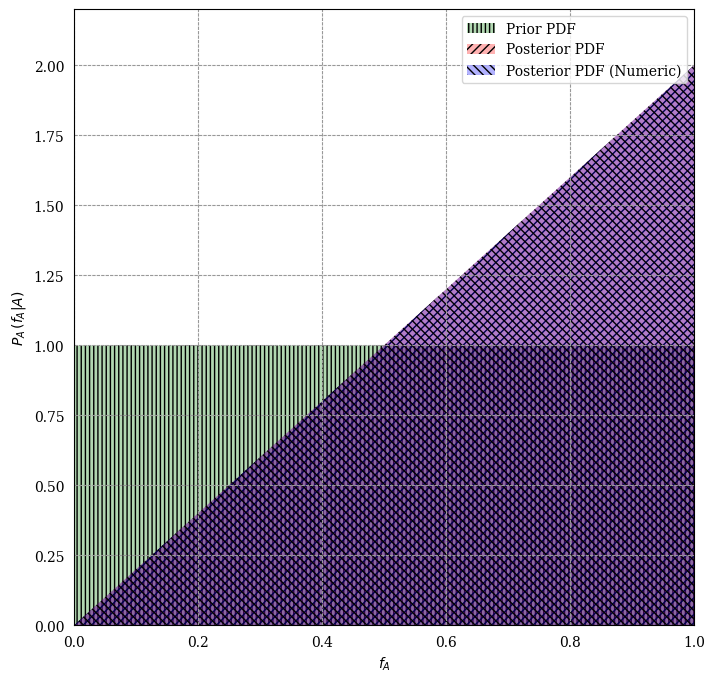

In [122]:
n, k = 1, 1
f_A = np.linspace(0, 1, 1000)
fig, ax = plt.subplots(1)
ax.fill_between(f_A, prior(f_A), alpha=.3, hatch=r"||||", facecolor="g", label="Prior PDF")
ax.fill_between(f_A, posterior(f_A, "A"), alpha=.3, hatch=r"////", facecolor="r", label="Posterior PDF")
ax.fill_between(f_A, beta.pdf(f_A, k+1, n-k+1), alpha=.3, hatch=r"\\\\", facecolor="b", label="Posterior PDF (Numeric)")
ax.set_xlabel(r"$f_A$")
ax.set_ylabel(r"$P_A\,(f_A|A)$")
# ax.set_title("Posterior PDF after Measurement A")
set_lims(ax)
ax.legend()
plt.show()

The prior distribution is uniform by definition. After measurement "A", the distribution of $f_A$ deforms so that larger values are more probable than smaller values. This change is to be expected intuitively, since the new information (one measurement of "A") suggests that the branching ratio $f_A$ should be larger than it was assumed to be with the uniform prior. The posterior distribution is linear and intersects the prior distribution at $f_A=0.5$.

d) At each measurement step, the following posteriors are calculated:
\begin{eqnarray}
P(f_A|AA) &=&  \frac{ f_A^1 \cdot (1 - f_A)^0 \cdot 2f_A}{\int f_A^1 \cdot (1 - f_A)^0 \cdot 2f_A\, df_A} = \frac{f_A^2}{\int_0^1 f_A^2 df_A} = 3f_A^2\\
P(f_A|AAB) &=& \frac{ f_A^0 \cdot (1 - f_A)^1 \cdot 3f_A^2}{\int f_A^0 \cdot (1 - f_A)^1 \cdot 3f_A^2\, df_A} = \frac{f_A^2 - f_A^3}{\int (f_A^2 - f_A^3)\, df_A} = \frac{f_A^2 - f_A^3}{\frac{1}{3}-\frac{1}{4}} = 12(f_A^2-f_A^3)\\
P(f_A|AABB) &=& \frac{ f_A^0 \cdot (1 - f_A)^1 \cdot 12(f_A^2-f_A^3)}{\int f_A^0 \cdot (1 - f_A)^1 \cdot 12(f_A^2-f_A^3)\, df_A} = \frac{f_A^2 - 2f_A^3 + f_A^4}{\int (f_A^2 - 2f_A^3 + f_A^4)\, df_A} = \frac{f_A^2 - 2f_A^3 + f_A^4}{\frac{1}{3}-\frac{2}{4}+\frac{1}{5}} = 30(f_A^2 - 2f_A^3 + f_A^4)\\
P(f_A|AABBA) &=& \frac{ f_A^1 \cdot (1 - f_A)^0 \cdot 30(f_A^2 - 2f_A^3 + f_A^4)}{\int f_A^1 \cdot (1 - f_A)^0 \cdot 30(f_A^2 - 2f_A^3 + f_A^4)\, df_A} = \frac{f_A^3 - 2f_A^4 + f_A^5}{\int (f_A^3 - 2f_A^4 + f_A^5)\, df_A} = \frac{f_A^3 - 2f_A^4 + f_A^5}{\frac{1}{4}-\frac{2}{5}+\frac{1}{6}} = 60(f_A^3 - 2f_A^4 + f_A^5)
\end{eqnarray}

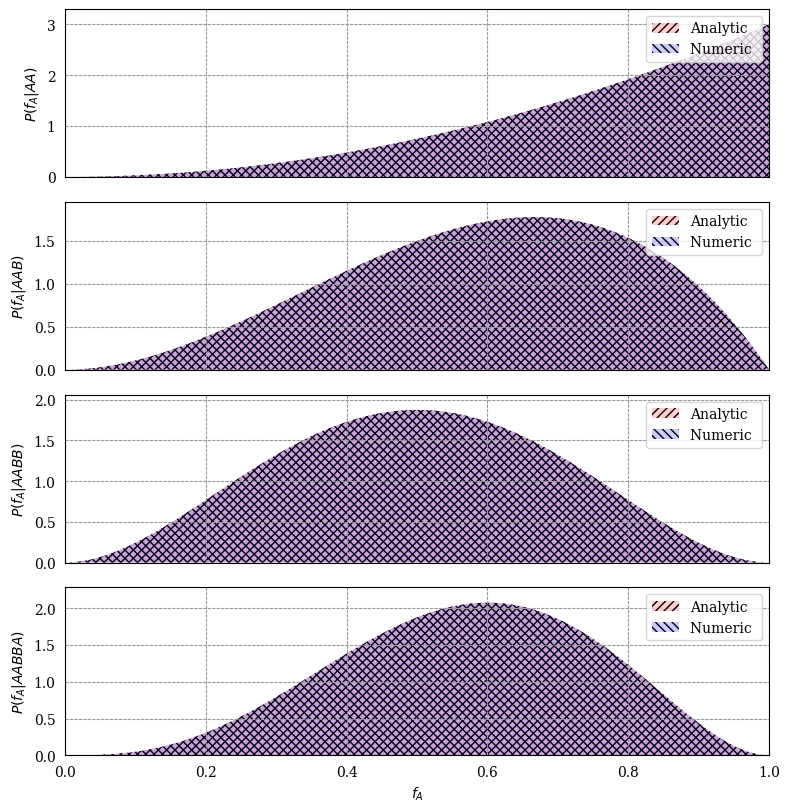

In [123]:
m = ["AA", "AAB", "AABB", "AABBA"]
fig, ax = plt.subplots(4, sharex=True)
for i in range(len(m)):
    n, k = len(m[i]), m[i].count("A")
    B, P = beta.pdf(f_A, k+1, n-k+1), posterior(f_A, m[i])
    ax[i].fill_between(f_A, P, alpha=.2, label=f"Analytic", hatch=r"////", facecolor="r")
    ax[i].fill_between(f_A, B, alpha=.2, label=f"Numeric ", hatch=r"\\\\", facecolor="b")
    ax[i].set_ylabel(f"$P(f_A|{m[i]})$")
    ax[i].set_xlim(f_A.min(), f_A.max())
    ax[i].legend()
    set_lims(ax[i], 0)
fig.tight_layout()
ax[-1].set_xlabel(r"$f_A$")
# ax[0].set_title("Posterior PDF after Measurements")
plt.show()

The posterior distribution after measurements A and A follows a parabola. As expected, higher values for $f_A$ are even more probable than before and lower values even less probable.
The subsequent measurement "B" strongly changes the posterior distribution. Values for $f_A \approx 0.9$ are now almost excluded, as they - with the given measurements A, A, B - very improbably describe the true branching ratio.
After the next measurement, "B", the posterior distribution is symmetrical again, since A and B were measured equally often. The expected value of $f_A$ is therefore $0.5$. Compared to the prior distribution, which is also symmetrical, the posterior distribution is now more restricted to values around $0.5$.
After the fifth measurement, "A", the posterior distribution shifts slightly towards larger values for $f_A$. It can also be observed that the distribution becomes slightly more peaked and narrowed after each measurement, which corresponds to the confidence gained from the measurements

 e) Calculate and draw the posterior after observing 100 decays, with 63 going to A. <br>

With $\alpha - 1 = n$ and $\beta - 1 = n - k$ one obtains for the generalised posterior:

$$P(f_A|\, k \text{ times } A\text{,}\,\, n-k \text{ times } B \,) = B(f_A, k+1, n-k + 1)$$

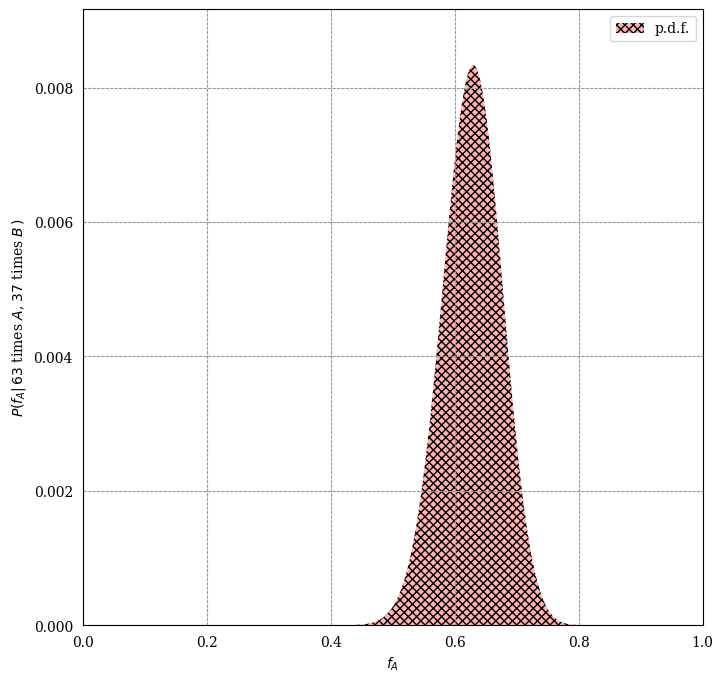

In [131]:
n, k = 100, 63
B = beta.pdf(f_A, k+1, n-k+1)
fig, ax = plt.subplots(1)
ax.fill_between(f_A, beta.pdf(f_A, k+1, n-k+1)/B.sum(), alpha=.3,label=f"p.d.f.", hatch=r"XXXX", facecolor="r")
ax.set_xlabel(r"$f_A$")
ax.set_ylabel(f"$P(f_A|\, {k} $ times $A$, ${n-k}$ times $B\,)$")
# ax.set_title(f"Posterior PDF after observing {n} decays with {k} going to A")
ax.legend()
set_lims(ax)
plt.show()

After 100 decays, the branching ratio could be narrowed down even further. The expected value is slightly below $0.63$, which corresponds to the naïve ratio $\frac{63}{100}$. However, the distribution is still extended, since it was only calculated by finitely many measurements.